# New Section

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:

IMAGE_SIZE = 224
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(224,224, 3), include_top=False)
pretrained_model.trainable = False

model = tf.keras.Sequential([
            pretrained_model,
           tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = "relu"),
            
            tf.keras.layers.Dense(2, activation = "softmax")
])

2021-12-04 21:40:23.249490: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-04 21:40:23.249610: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-04 21:40:23.253264: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


9412608/9406464 [==============================] - 0s 0us/step


In [3]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
# Train from scratch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [5]:
train_generator = train_datagen.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [6]:
validation_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 624 images belonging to 2 classes.


In [7]:
hist = model.fit(train_generator,steps_per_epoch=100 ,epochs=15, validation_data=validation_generator) 


2021-12-04 21:40:24.942538: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-04 21:40:24.954905: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3800135000 Hz


Epoch 1/15
100/100 [==============================] - 76s 739ms/step - loss: 4.8087 - accuracy: 0.8212 - val_loss: 0.4378 - val_accuracy: 0.8638
Epoch 2/15
100/100 [==============================] - 69s 693ms/step - loss: 0.2151 - accuracy: 0.9595 - val_loss: 0.3942 - val_accuracy: 0.8942
Epoch 3/15
100/100 [==============================] - 70s 703ms/step - loss: 0.1983 - accuracy: 0.9629 - val_loss: 0.3739 - val_accuracy: 0.9071
Epoch 4/15
100/100 [==============================] - 72s 719ms/step - loss: 0.1870 - accuracy: 0.9697 - val_loss: 0.4038 - val_accuracy: 0.8958
Epoch 5/15
100/100 [==============================] - 72s 716ms/step - loss: 0.1830 - accuracy: 0.9483 - val_loss: 0.4520 - val_accuracy: 0.8814
Epoch 6/15
100/100 [==============================] - 73s 724ms/step - loss: 0.1386 - accuracy: 0.9678 - val_loss: 0.3931 - val_accuracy: 0.8830
Epoch 7/15
100/100 [==============================] - 70s 699ms/step - loss: 0.1351 - accuracy: 0.9731 - val_loss: 0.3694 - val_ac

**Model Image**

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='xray-resnet50.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


**Model Summary**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8028288   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 10,286,530
Trainable params: 8,028,546
Non-trainable params: 2,257,984
_________________________________________________________________


**Accuracy and Loss Graph**

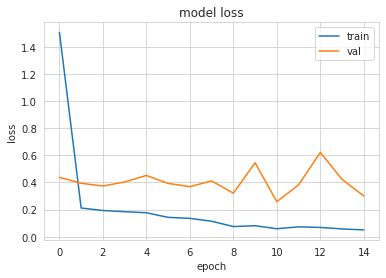

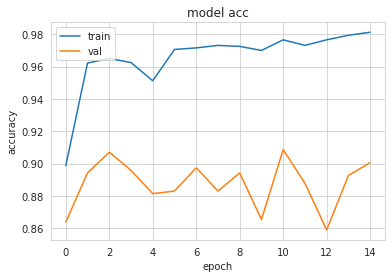

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.xlim(1, 21)
#plt.ylim(0, 1)
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.xlim(1, 21)
#plt.ylim(0, 1)
plt.show()

**Confusion Matrix**

In [11]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


#plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])

**Confusion Matrix accuray precission of_validation**

[[195  39]
 [ 23 367]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       234
           1       0.90      0.94      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



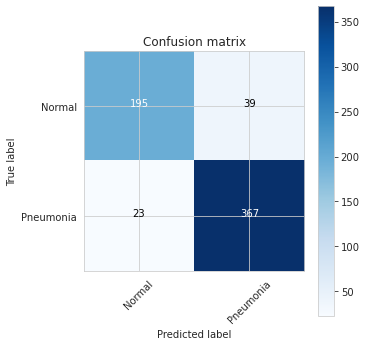

In [12]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = validation_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

**Confusion accuracy of test gen**

Found 16 images belonging to 2 classes.
[[8 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



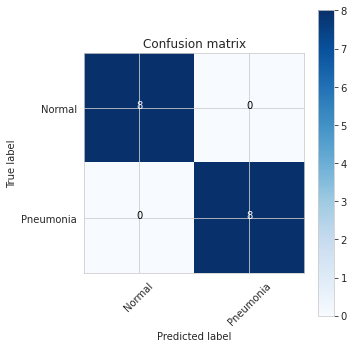

In [13]:
test_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(test_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = test_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 